# ToC Button E2E Test - Basic Functionality on Notebook 7

- Test that ToC button works properly on Notebook 7
- Verify that clicking the button shows the Table of Contents panel
- Verify that clicking the button again hides the Table of Contents panel

In [14]:
notebook7_url = "http://localhost:8888/tree?token=test-token"
default_result_path = None
close_on_fail = False
transition_timeout = 10000
default_delay = 200
browser_type = "chromium"
jupyter_work_dir = '../artifacts/jupyter-work'

In [15]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp82ftbpbv'

In [16]:
import re
import asyncio
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

import scripts.jupyterlab as jupyterlab
importlib.reload(jupyterlab)

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path, delay=default_delay, browser_type=browser_type)

('20251114-130155',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpahibw_6g')

## Open Notebook 7 tree view and wait for it to load

Start epoch: 1763092915.691935 seconds
Notebook 7 tree view loaded


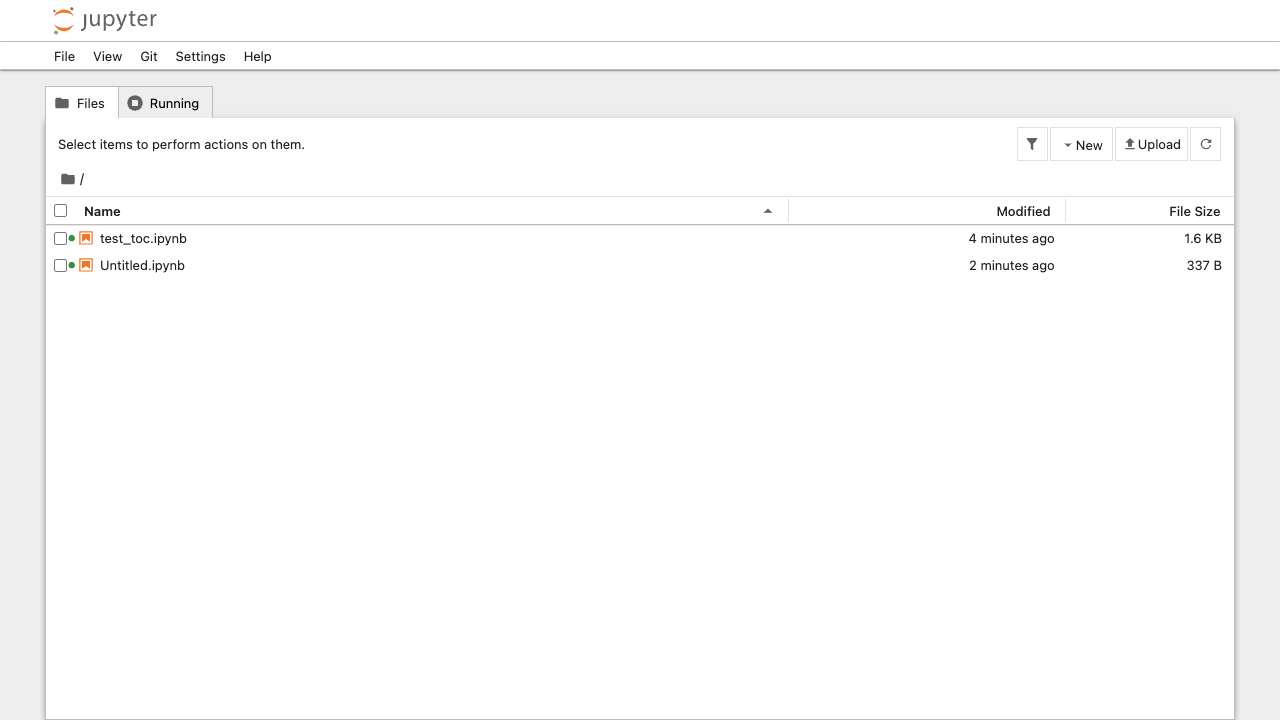

In [17]:
tree_page = None

async def _step(page):
    await page.goto(notebook7_url)

    # Wait for Notebook 7 tree view to load
    await expect(page.locator('.jp-FileBrowser-Panel')).to_be_visible(timeout=transition_timeout)

    global tree_page
    tree_page = page
    
    print("Notebook 7 tree view loaded")

await run_pw(_step)

## Open test notebook

In [18]:
notebook_page = None

async def _step(page):
    # Find test_toc.ipynb in file list and double-click to open it
    notebook_item = page.locator('.jp-DirListing-item[title*="test_toc.ipynb"]')
    await expect(notebook_item).to_be_visible(timeout=transition_timeout)
    
    # Double-click on notebook item and wait for new page
    new_page_promise = page.context.wait_for_event('page')
    await notebook_item.dblclick()
    new_page = await new_page_promise
    
    # Wait for notebook to load
    await expect(new_page.locator('.jp-NotebookPanel:not(.lm-DockPanel-widget)')).to_be_visible(timeout=transition_timeout)
    
    print("test_toc.ipynb opened successfully")
    
    return new_page

notebook_page = await run_pw(_step)

Start epoch: 1763092916.79676 seconds
test_toc.ipynb opened successfully


## Verify ToC button exists and click it

Start epoch: 1763092917.825876 seconds
ToC button is visible
ToC panel is visible after clicking button


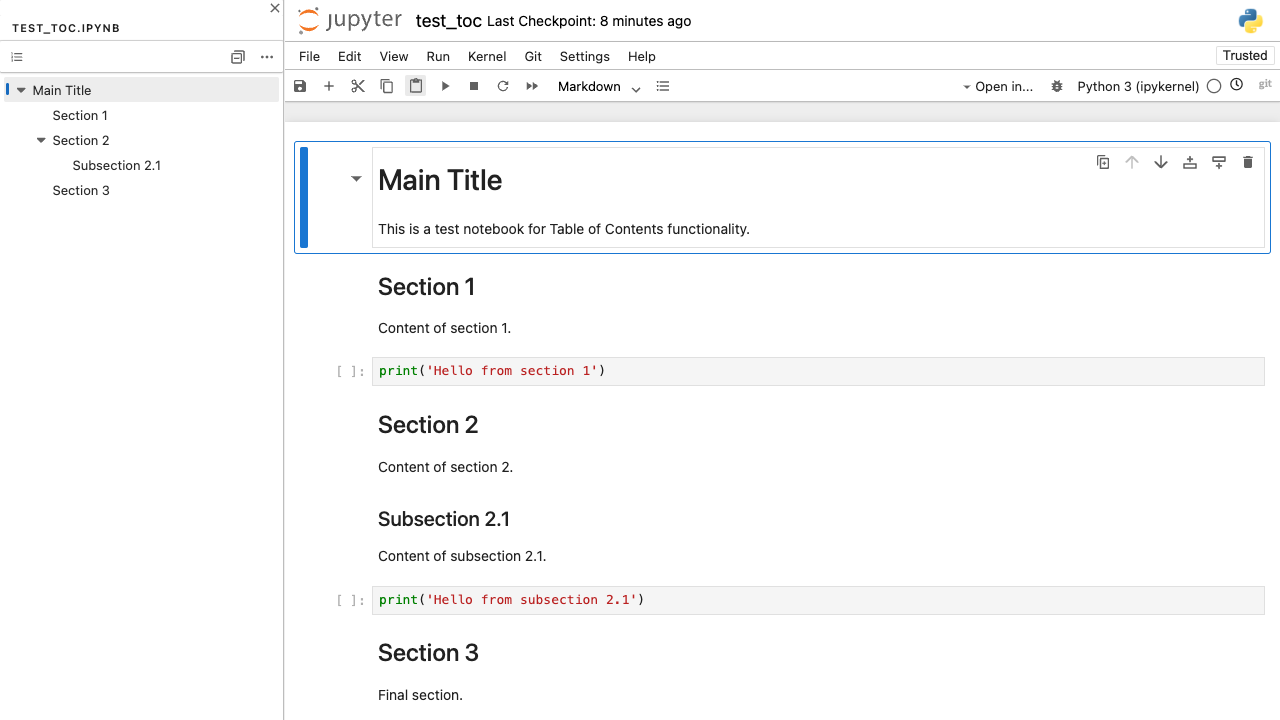

In [19]:
async def _step(page):
    # Find ToC button
    toc_button = page.locator('[data-command="table_of_contents:table-of-contents"]')
    await expect(toc_button).to_be_visible(timeout=transition_timeout)
    
    print("ToC button is visible")
    
    # Click ToC button
    await toc_button.click()
    await asyncio.sleep(1)
    
    # Verify that ToC panel is now visible
    toc_panel = page.locator('#table-of-contents')
    await expect(toc_panel).to_be_visible(timeout=transition_timeout)
    
    print("ToC panel is visible after clicking button")

await run_pw(_step)

## Click ToC button again to hide the panel

Start epoch: 1763092919.1865668 seconds
ToC panel is hidden after clicking button again


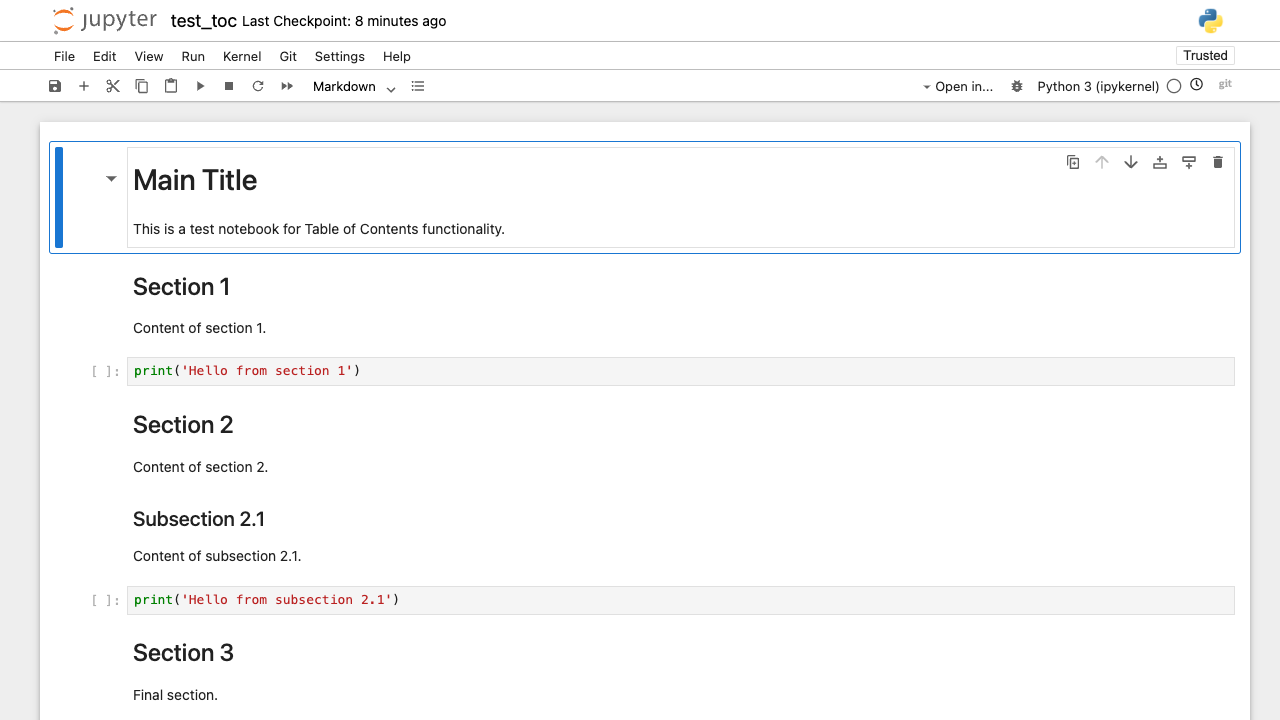

In [20]:
async def _step(page):
    # Click ToC button again
    toc_button = page.locator('[data-command="table_of_contents:table-of-contents"]')
    await toc_button.click()
    await asyncio.sleep(1)
    
    # Verify that ToC panel is now hidden
    toc_panel = page.locator('#table-of-contents')
    await expect(toc_panel).to_be_hidden(timeout=transition_timeout)
    
    print("ToC panel is hidden after clicking button again")

await run_pw(_step)

## Clean up

In [21]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp82ftbpbv/video-1.webm
Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp82ftbpbv/video-2.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp82ftbpbv/har.zip
Console log: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp82ftbpbv/console.log


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/Jupyter-LC_ToC_button/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 254, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpahibw_6g/videos/8fe4d8cdaef2ceb0715b0becf3f463f0.webm'
スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/Jupyter-LC_ToC_button/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 254, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFou

In [22]:
!rm -fr {work_dir}